# Case - Análise da ação da Vale (VALE3.SA) no período de 2018 a 2020
## Autor: Hugo Azevedo

**Importando as bibliotecas**

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Pegando os dados da ação da Vale pelo yahoo finance, usando a biblioteca pandas_datareader.**

**O Período em questão (2018 a 2020) já foi inserido na chamada da função**

In [2]:
vale = data.DataReader('VALE3.SA', data_source='yahoo', 
                       start='1-1-2018', end='1-1-2021')
vale

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,41.740002,40.439999,40.439999,41.720001,14156500.0,35.877056
2018-01-03,41.880001,41.299999,41.830002,41.470001,12744200.0,35.662075
2018-01-04,42.369999,41.520000,41.810001,41.639999,18433000.0,35.808262
2018-01-05,42.290001,41.310001,41.570000,42.290001,15251300.0,36.367233
2018-01-08,43.230000,42.400002,42.400002,43.230000,14542800.0,37.175583
...,...,...,...,...,...,...
2020-12-22,86.989998,85.430000,86.860001,86.940002,23157000.0,83.192207
2020-12-23,87.529999,86.400002,86.529999,87.360001,17710200.0,83.594101
2020-12-28,88.580002,87.080002,87.790001,87.309998,26001300.0,83.546249


### - Preço de fechamento diário (em forma de gráfico em série de tempo)

**Usa-se os valores de fechamento ajustado para evitar interferência de fatores que alterem o preço de fechamento,  \
como divisão de ações, emissão de dividendos ou direitos aos shareholders**

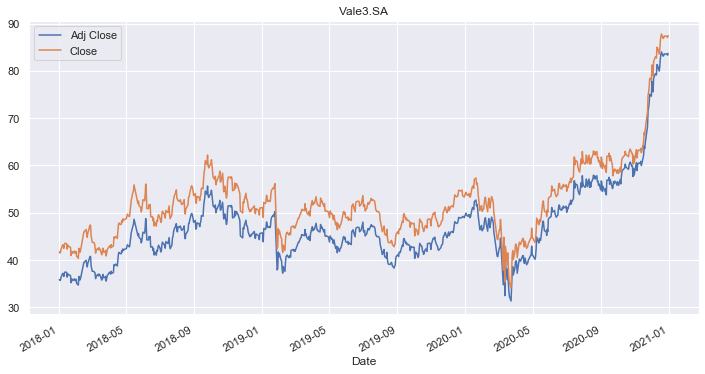

In [3]:
vale['Adj Close'].plot(figsize=(12,6), legend=True, grid=True, title='Vale3.SA')
vale['Close'].plot(legend=True)

### - Histograma dos retornos diários desse ativo

**Faz-se primeiro a análise dos retornos diários,  \
usando a função já imbutida na biblioteca pandas pct_change()**

In [4]:
returns = vale['Adj Close'].pct_change().dropna() 
# Calcula o retorno diários do ativo
# a função dropna é para retirar o valor "NaN" 
# presente na primeira linha da Series, 
# visto que não há retorno diários no primeiro dia de análise dos retornos
returns

Date
2018-01-03   -0.005992
2018-01-04    0.004099
2018-01-05    0.015610
2018-01-08    0.022227
2018-01-09   -0.003701
                ...   
2020-12-22    0.000921
2020-12-23    0.004831
2020-12-28   -0.000572
2020-12-29   -0.002749
2020-12-30    0.004364
Name: Adj Close, Length: 738, dtype: float64

**Cálculo manual, de modo a validar a célula acima**

In [5]:
prices = vale['Adj Close']
returns_manual = prices.iloc[1:].values/prices.iloc[:-1] - 1
returns_manual

Date
2018-01-02   -0.005992
2018-01-03    0.004099
2018-01-04    0.015610
2018-01-05    0.022227
2018-01-08   -0.003701
                ...   
2020-12-21    0.000921
2020-12-22    0.004831
2020-12-23   -0.000572
2020-12-28   -0.002749
2020-12-29    0.004364
Name: Adj Close, Length: 738, dtype: float64

In [6]:
prices = vale['Adj Close']
returns_manual = prices/prices.shift(1) - 1
returns_manual = returns_manual[1:]
returns_manual

Date
2018-01-03   -0.005992
2018-01-04    0.004099
2018-01-05    0.015610
2018-01-08    0.022227
2018-01-09   -0.003701
                ...   
2020-12-22    0.000921
2020-12-23    0.004831
2020-12-28   -0.000572
2020-12-29   -0.002749
2020-12-30    0.004364
Name: Adj Close, Length: 738, dtype: float64

In [7]:
aux = (returns == returns_manual) # pd.Series com valores "True" ou "False"
aux_l = aux.values # Vetor com valores "True" ou "False"
contador_de_verdadeiros = 0
for i in range(len(aux_l)):
    if aux_l[i] == 'False': # Caso tenha algum valor falso, retornar o print abaixo
        print("As duas formas de calcular não são compatíveis")
        break
    else:
        contador_de_verdadeiros += 1 # se não tem nenhuma comparação falsa, contar +1 na variável indicada
        
contador_de_verdadeiros, returns.shape[0], vale['Adj Close'].shape[0]

(738, 738, 739)

**Plota-se, então, o histograma**

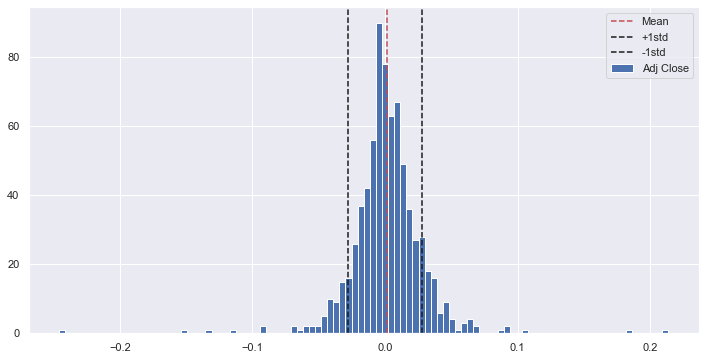

In [8]:
returns.hist(bins=100, figsize=(12,6), legend=True)
mean = returns.mean()
std = returns.std()

plt.axvline(x=mean, color='r', linestyle='--', label = 'Mean')
plt.axvline(x=std, color='k', linestyle='--', label = '+1std')
plt.axvline(x=-std, color='k', linestyle='--', label = '-1std')
plt.legend()

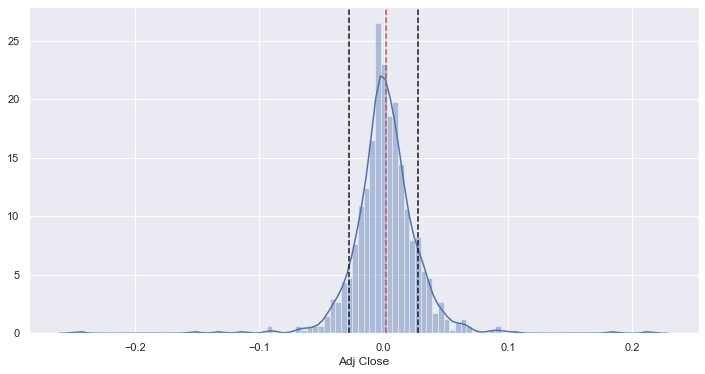

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
sns.distplot(returns, bins=100, ax=ax1)
plt.axvline(x=mean, color='r', linestyle='--', label = 'Mean')
plt.axvline(x=std, color='k', linestyle='--', label = '+1std')
plt.axvline(x=-std, color='k', linestyle='--', label = '-1std')

### - Calcular a volatilidade (desvio padrão) dos retornos nesse período.

**Cálculo de forma automatica, via uso de biblioteca do python**

In [10]:
returns.std() # calcula o desvio padrão da amostra, denominador = n-1

0.02770783971888649

**Cálculo manual, de modo a validar a célula acima**

In [11]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = np.sqrt(variance) # calcula o desvio padrão da amostra, denominador = n-1
volatility

0.02770783971888649

In [12]:
volatility == returns.std()

True

**Volatilidade Anualizada**

In [13]:
returns.std()*np.sqrt(252) # volatilidade anual

0.4398483195780688